<a href="https://colab.research.google.com/github/liumOazed/Neural_Network_With_Tensorflow/blob/main/regression_Challange_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Creating own regression dataset
X = tf.range(-1000, 1000, 2)


In [ ]:
y = X - 20


In [ ]:
X_train = X[:700]
y_train = y[:700]
X_test = X[700:]
y_test = y[700:]
len(X_train), len(X_test), len(y_train), len(y_test)

(700, 300, 700, 300)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
y_train

<tf.Tensor: shape=(700,), dtype=int32, numpy=
array([-1020, -1018, -1016, -1014, -1012, -1010, -1008, -1006, -1004,
       -1002, -1000,  -998,  -996,  -994,  -992,  -990,  -988,  -986,
        -984,  -982,  -980,  -978,  -976,  -974,  -972,  -970,  -968,
        -966,  -964,  -962,  -960,  -958,  -956,  -954,  -952,  -950,
        -948,  -946,  -944,  -942,  -940,  -938,  -936,  -934,  -932,
        -930,  -928,  -926,  -924,  -922,  -920,  -918,  -916,  -914,
        -912,  -910,  -908,  -906,  -904,  -902,  -900,  -898,  -896,
        -894,  -892,  -890,  -888,  -886,  -884,  -882,  -880,  -878,
        -876,  -874,  -872,  -870,  -868,  -866,  -864,  -862,  -860,
        -858,  -856,  -854,  -852,  -850,  -848,  -846,  -844,  -842,
        -840,  -838,  -836,  -834,  -832,  -830,  -828,  -826,  -824,
        -822,  -820,  -818,  -816,  -814,  -812,  -810,  -808,  -806,
        -804,  -802,  -800,  -798,  -796,  -794,  -792,  -790,  -788,
        -786,  -784,  -782,  -780,  -778,  -

In [ ]:
# Lets create a model to predic y label
tf.random_seed = 42
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 1. create model 
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss="mae", optimizer = tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train,callbacks=[callback], epochs=400)

Epoch 1/400
22/22 [==============================] - 0s 2ms/step - loss: 170.7346 - mae: 170.7346
Epoch 2/400
22/22 [==============================] - 0s 2ms/step - loss: 27.5580 - mae: 27.5580
Epoch 3/400
22/22 [==============================] - 0s 2ms/step - loss: 16.8191 - mae: 16.8191
Epoch 4/400
22/22 [==============================] - 0s 2ms/step - loss: 12.8633 - mae: 12.8633
Epoch 5/400
22/22 [==============================] - 0s 2ms/step - loss: 12.9208 - mae: 12.9208
Epoch 6/400
22/22 [==============================] - 0s 2ms/step - loss: 13.1415 - mae: 13.1415
Epoch 7/400
22/22 [==============================] - 0s 2ms/step - loss: 12.2846 - mae: 12.2846
Epoch 8/400
22/22 [==============================] - 0s 2ms/step - loss: 12.2145 - mae: 12.2145
Epoch 9/400
22/22 [==============================] - 0s 2ms/step - loss: 12.2146 - mae: 12.2146
Epoch 10/400
22/22 [==============================] - 0s 2ms/step - loss: 11.9882 - mae: 11.9882
Epoch 11/400
22/22 [=================

In [ ]:
# make prediction base on X_test labels
y_pred = model.predict(X_test)
y_pred, y_test

(array([[393.64185],
        [395.63672],
        [397.63162],
        [399.6266 ],
        [401.6215 ],
        [403.61636],
        [405.6114 ],
        [407.60632],
        [409.60126],
        [411.5961 ],
        [413.5911 ],
        [415.586  ],
        [417.5809 ],
        [419.57584],
        [421.57077],
        [423.56567],
        [425.56067],
        [427.5555 ],
        [429.55057],
        [431.5454 ],
        [433.54034],
        [435.53534],
        [437.53018],
        [439.5252 ],
        [441.52002],
        [443.51495],
        [445.50992],
        [447.50482],
        [449.49973],
        [451.49463],
        [453.48965],
        [455.48453],
        [457.4795 ],
        [459.4744 ],
        [461.4693 ],
        [463.46426],
        [465.4592 ],
        [467.45404],
        [469.449  ],
        [471.44394],
        [473.43887],
        [475.43378],
        [477.42877],
        [479.42365],
        [481.41858],
        [483.41357],
        [485.40842],
        [487.

In [ ]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 12.8834 - mae: 12.8834


[12.883411407470703, 12.883411407470703]

In [ ]:
def plot_prediction(train_data=X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predicted_data =y_pred ):
  
  """A function that visualize the data with prediction"""
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  # Plot predicted data in red
  plt.scatter(test_data,predicted_data, c="r", label="Predicted Data")
  # Show the legend
  plt.legend();



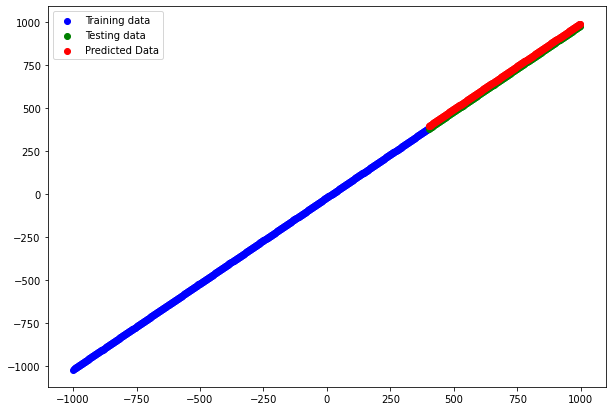

In [ ]:
plot_prediction(X_train, y_train,X_test,y_test, y_pred)

Text(0.5, 0, 'epochs')

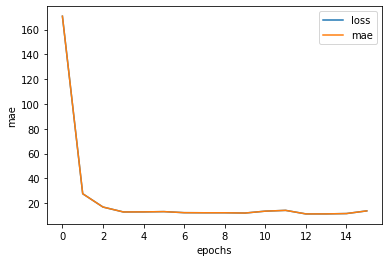

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("mae")
plt.xlabel("epochs")

In [ ]:
# Load data
data = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz'
)

In [ ]:
data

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.